In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pickle
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../scripts")
import models
from hmmlearn import hmm

In [3]:
# Load up one sequence
base_path = '/Users/venkatesh-sivaraman/Documents/School/MIT/6-047/proj/hicmotif/data/'

with open(os.path.join(base_path, 'epigenomic_tracks', 'GM12878.pickle'), 'rb') as file:
    id, data = pickle.load(file)

seq = None
for record in SeqIO.parse(os.path.join(base_path, 'loop_sequences_GM12878.fasta'), 'fasta'):
    print(record.id.replace('chr', ''), id)
    if record.id.replace('chr', '') != id: continue
    seq = models.Sequence(id, str(record.seq), data)
    break

print(len(seq.seq))

10:100225000:100425000 10:100225000:100425000
200000


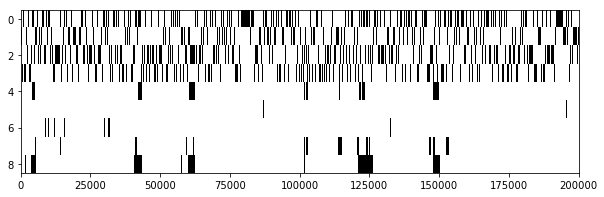

In [4]:
observed_data = seq.to_array().T
plt.figure(figsize=(10, 3))
plt.imshow(observed_data.T, cmap='Greys', aspect='auto')
plt.show()

In [17]:
model = hmm.GaussianHMM(n_components=2)

In [18]:
print(observed_data.shape)
model.fit(observed_data)

(200000, 9)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

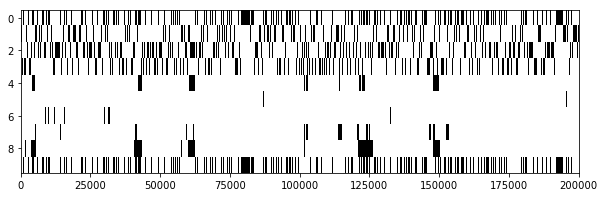

In [19]:
Y_pred = model.predict(observed_data)
plt.figure(figsize=(10, 3))
plt.imshow(np.vstack([observed_data.T, Y_pred]), cmap='Greys', aspect='auto')
plt.show()

[ True  True  True ...  True  True  True]


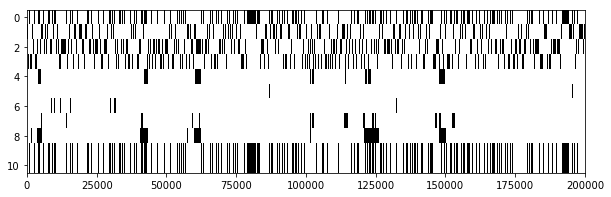

In [22]:
new_model = hmm.GaussianHMM(n_components=2, init_params='mc')
new_model.startprob_ = model.startprob_
new_model.transmat_ = model.transmat_
new_model.fit(observed_data)
new_Y_pred = new_model.predict(observed_data)
print(Y_pred == new_Y_pred)
plt.figure(figsize=(10, 3))
plt.imshow(np.vstack([observed_data.T, Y_pred, new_Y_pred]), cmap='Greys', aspect='auto')
plt.show()